# Data exploring of the processed year: Humidity, Temperature, Wind, Rain and Date. Only the 4 stations in namsestraat, inputing missing values with KNN

## importing packages

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


## Loading data

In [24]:
year = pd.read_csv('meteo_data/yearMeanByHour&ID.csv', index_col='DATEUTC')

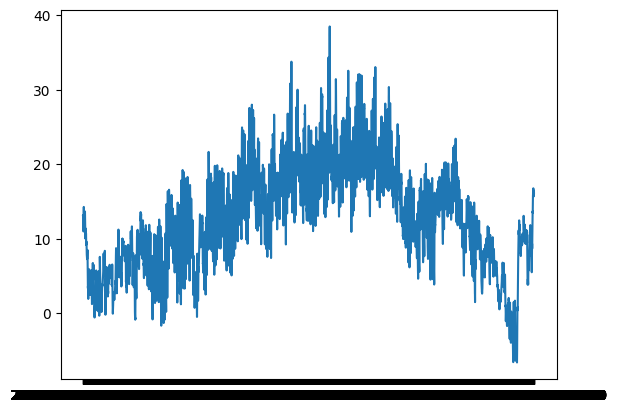

In [7]:
hum = 'LC_HUMIDITY'
temp = 'LC_TEMP_QCL3'
rain = 'LC_RAININ'
dailyRain = 'LC_DAILYRAIN'
wind='LC_WINDSPEED'
plt.plot(year['DATEUTC'],year[temp])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

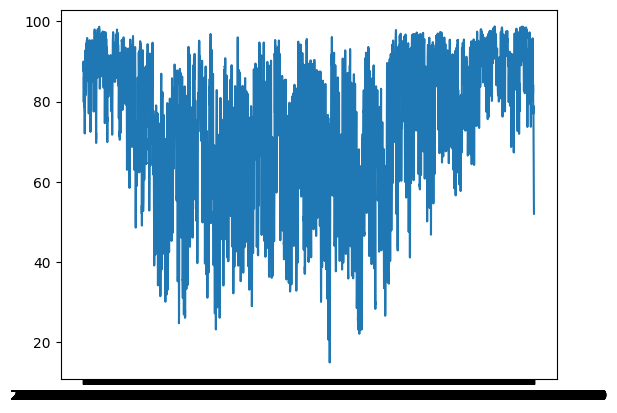

In [10]:
plt.plot(year['DATEUTC'],year[hum])
plt.show

In [8]:
year.describe()

,LC_TEMP_QCL3,LC_HUMIDITY,LC_WINDSPEED,LC_RAININ,LC_DAILYRAIN
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,12.786226,73.813745,0.248767,0.000089,0.001007
std,7.156748,18.187137,0.340915,0.000524,0.003152
min,-6.625976,14.875000,0.000000,0.000000,0.000000
25%,7.603919,60.875000,0.017500,0.000000,0.000000
50%,12.552080,78.083333,0.122917,0.000000,0.000000
75%,17.814810,89.041667,0.345000,0.000000,0.000000
max,38.502476,98.750000,3.444167,0.017333,0.040042


In [30]:
# Definying a function for correlation identification with heatmap visualization
def correlation_heatmap(df):
    # Getting correlation matrix
    corr_matrix = df.corr()
    # Print correlation matrix
    print("Correlation Matrix:\n", corr_matrix.to_string())
    # Create heatmap plot
    plt.figure(figsize=(10, 8)) # Suggested for plotting the correlation heatmap
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1, fmt='.1f')
    # Show the plot
    plt.show()

Correlation Matrix:
               LC_TEMP_QCL3  LC_HUMIDITY  LC_WINDSPEED  LC_RAININ  LC_DAILYRAIN
LC_TEMP_QCL3      1.000000    -0.636901      0.023942  -0.023366     -0.025890
LC_HUMIDITY      -0.636901     1.000000     -0.225474   0.162014      0.226311
LC_WINDSPEED      0.023942    -0.225474      1.000000   0.048556      0.076983
LC_RAININ        -0.023366     0.162014      0.048556   1.000000      0.352040
LC_DAILYRAIN     -0.025890     0.226311      0.076983   0.352040      1.000000


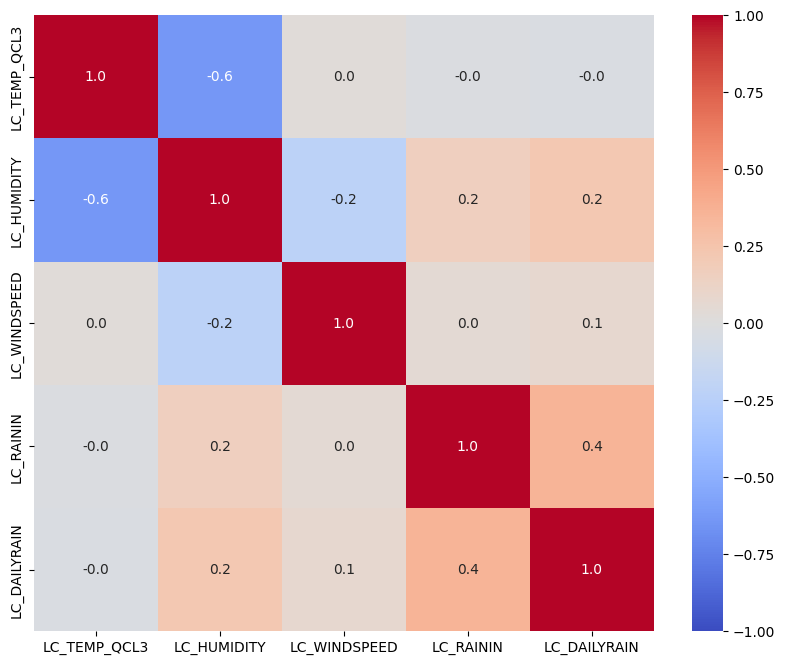

In [31]:
correlation_heatmap(year)

## Measuring Variance

In [13]:
# Group dataset by time
group = year.groupby('DATEUTC')
# Calculate the mean values for each 10 minutes

mean_values = group[[temp,hum,rain,dailyRain,wind]].mean()

# Calculate the variance for each 10 minutes
variance_values = group[[temp,hum,rain,dailyRain,wind]].var()



In [ ]:
plt.plot(mean_values.index, mean_values[temp], label='Temperature mean among stations')
plt.xlabel('Date')
plt.ylabel('mean')
plt.title('mean of Weather Measurements')
plt.legend()
plt.show()


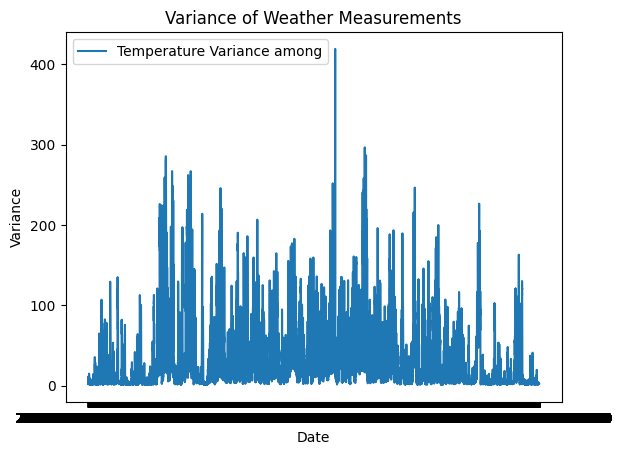

In [15]:
plt.plot(variance_values.index, variance_values[temp], label='Temperature Variance among stations')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.title('Variance of Weather Measurements')
plt.legend()
plt.show()


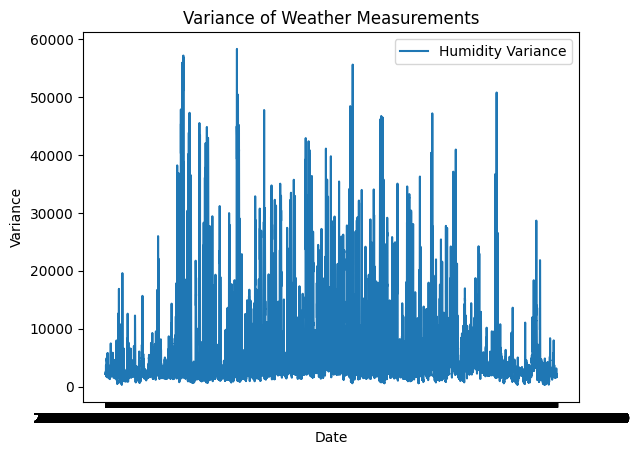

In [16]:
plt.plot(variance_values.index, variance_values[hum], label='Humidity Variance')


plt.xlabel('Date')
plt.ylabel('Variance')
plt.title('Variance of Weather Measurements')
plt.legend()
plt.show()

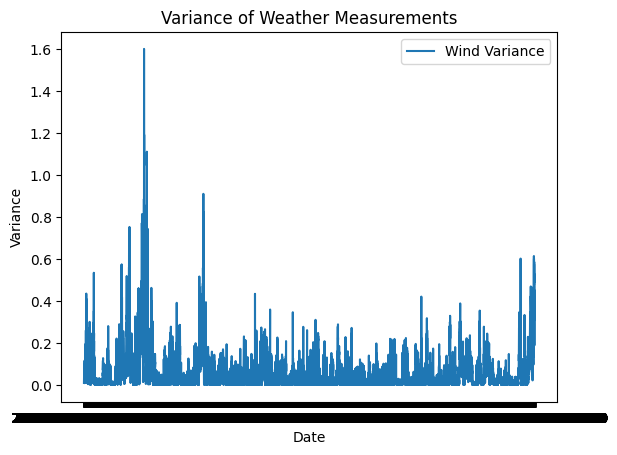

In [17]:

plt.plot(variance_values.index, variance_values[wind], label='Wind Variance')

plt.xlabel('Date')
plt.ylabel('Variance')
plt.title('Variance of Weather Measurements')
plt.legend()
plt.show()

In [ ]:
plt.plot(variance_values.index, variance_values[rain], label='Rain Variance')


plt.xlabel('Date')
plt.ylabel('Variance')
plt.title('Variance of Weather Measurements')
plt.legend()
plt.show()

In [ ]:
plt.plot(variance_values.index, variance_values[dailyRain], label='Daily rain Variance')


plt.xlabel('Date')
plt.ylabel('Variance')
plt.title('Variance of Weather Measurements')
plt.legend()
plt.show()